<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data

_Author: Joseph Nelson (DC)_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis (Pandas not required) to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

---

## Basic Level

### Part 1: Read in the file with `csv.reader()` and store it in an object called `file_nested_list`.

Hint: This is a TSV (tab-separated value) file, and `csv.reader()` needs to be told [how to handle it](https://docs.python.org/2/library/csv.html).

In [1]:
import csv
from collections import namedtuple   # Convenient to store the data rows

DATA_FILE = './data/chipotle.tsv'

In [2]:
with open(DATA_FILE, 'r') as file:
    file_nested_list = [row for row in csv.reader(file, delimiter='\t')]

### Part 2: Separate `file_nested_list` into the `header` and the `data`.


In [3]:
header = file_nested_list[0]
header

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

In [4]:
data = file_nested_list[1:]
data[:7]

[['1', '1', 'Chips and Fresh Tomato Salsa', 'NULL', '$2.39 '],
 ['1', '1', 'Izze', '[Clementine]', '$3.39 '],
 ['1', '1', 'Nantucket Nectar', '[Apple]', '$3.39 '],
 ['1', '1', 'Chips and Tomatillo-Green Chili Salsa', 'NULL', '$2.39 '],
 ['2',
  '2',
  'Chicken Bowl',
  '[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]',
  '$16.98 '],
 ['3',
  '1',
  'Chicken Bowl',
  '[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]',
  '$10.98 '],
 ['3', '1', 'Side of Chips', 'NULL', '$1.69 ']]

In [5]:
# Order = namedtuple('Order', 'order_id quantity item_name choice_description item_price')

---

## Intermediate Level

### Part 3: Calculate the average price of an order.

Hint: Examine the data to see if the `quantity` column is relevant to this calculation.

Hint: Think carefully about the simplest way to do this!

Get number of orders

In [7]:
num_orders = len(set([ row[0] for row in data ]))
num_orders

1834

Create list of prices

In [8]:
# quantity already factored into item_price
price_list = []
for item in data:
    price_list.append( float( item[4].replace('$','') ) )
price_list[:6]

[2.39, 3.39, 3.39, 2.39, 16.98, 10.98]

In [9]:
price = [ float(row[4][1:-1]) for row in data ]
price[:6]

[2.39, 3.39, 3.39, 2.39, 16.98, 10.98]

##  Answer:
Get average by summing list of prices, divided by number of orders.  Rounded to 2

In [10]:
print( round(sum(price_list) / num_orders, 2) )

18.81


### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

In [14]:
unique_sodas =[]
for row in data:
    # check if string 'Canned' is in the ordered item
    if 'Canned' in row[2]:
        # strip array brackets from the soda string
        soda = str(row[3]).replace('[','').replace(']','')
        if soda not in unique_sodas:
            # if the soda not in the array of sodas, append it. otherwise do nothing
            unique_sodas.append(soda)
unique_sodas

['Sprite',
 'Dr. Pepper',
 'Mountain Dew',
 'Diet Dr. Pepper',
 'Coca Cola',
 'Diet Coke',
 'Coke',
 'Lemonade',
 'Nestea']

In [15]:
sodas = [row[3][1:-1] for row in data if 'Canned' in row[2]]
unique = set(sodas)
unique

{'Coca Cola',
 'Coke',
 'Diet Coke',
 'Diet Dr. Pepper',
 'Dr. Pepper',
 'Lemonade',
 'Mountain Dew',
 'Nestea',
 'Sprite'}

---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [16]:
count = []
for item in data:
    if 'Burrito' in item[2]:
        toppings = item[3].replace('[','').replace(']','')
        toppings = toppings.split(',')
        count.append( len(toppings) )
print( sum(count) / len(count) )

5.395051194539249


### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [17]:
from collections import defaultdict

In [18]:
chip_count = defaultdict(int)
for item in data:
    if 'Chips' in item[2]:
        chip_count[ item[2] ] +=  int(item[1])
chip_count

defaultdict(int,
            {'Chips': 230,
             'Chips and Fresh Tomato Salsa': 130,
             'Chips and Guacamole': 506,
             'Chips and Mild Fresh Tomato Salsa': 1,
             'Chips and Roasted Chili Corn Salsa': 23,
             'Chips and Roasted Chili-Corn Salsa': 18,
             'Chips and Tomatillo Green Chili Salsa': 45,
             'Chips and Tomatillo Red Chili Salsa': 50,
             'Chips and Tomatillo-Green Chili Salsa': 33,
             'Chips and Tomatillo-Red Chili Salsa': 25,
             'Side of Chips': 110})

---

## Bonus: Craft a problem statement about this data that interests you, and then answer it!


At Chipotle, adding guacamole costs 1 USD.  Let us see how much these 1834 orders could have saved

In [19]:
count = 0
for row in data:
    for items in row[3].split(','):
        if 'Guacamole' in items:
            count += 1
count

1037

Convert to Pandas DataFrame and run some Linear Regression on it

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [21]:
df = pd.DataFrame(columns=header, data=data)
df['order_id'] = df[['order_id']].astype(int)
df['quantity'] = df[['quantity']].astype(int)
df['item_price'] = df['item_price'].apply(lambda x: float( x[1:] ))
df.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [22]:
guaca = []
for i, v in df['choice_description'].iteritems():
    if 'Guacamole' in v:
        guaca.append(1)
    else:
        guaca.append(0)
df['yes_guac'] = guaca

In [23]:
ing = []
for i,v in df['choice_description'].iteritems():
    hold = v.split(',')
    ing.append( len(hold) )
df['ingredient_count'] = ing

In [24]:
df.head()

,order_id,quantity,item_name,choice_description,item_price,yes_guac,ingredient_count
0,1,1,Chips and Fresh Tomato Salsa,NULL,2.39,0,1
1,1,1,Izze,[Clementine],3.39,0,1
2,1,1,Nantucket Nectar,[Apple],3.39,0,1
3,1,1,Chips and Tomatillo-Green Chili Salsa,NULL,2.39,0,1
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,0,5


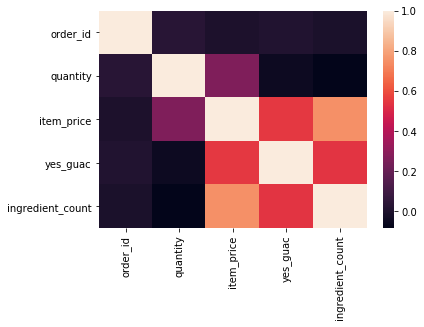

In [25]:
sns.heatmap( df.corr() )

In [26]:
feature_cols = ['item_price', 'ingredient_count']
X = df[feature_cols]
Y = df.yes_guac

In [27]:
X.shape

(4622, 2)

In [28]:
Y.shape

(4622,)

In [31]:
lr = LinearRegression()
lr.fit(X, Y)
print(lr.intercept_)
print(lr.coef_)

-0.20319399421
[ 0.03245672  0.0503765 ]


In [32]:
def train_test_rmse(df, feature_cols):
    X = df[feature_cols]
    y = df.yes_guac
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    
    # This probably isn't ideal
    for idx, val in enumerate(y_pred):
        if val < 0.5:
            y_pred[idx] = 0
        else:
            y_pred[idx] = 1
    
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [33]:
train_test_rmse(df, feature_cols)

0.3868513658225266

That's not great, but I can't think of any other features to add

### Test Code

In [34]:
arr = [1, 1, 2, 3, 4, 5, 5, 1]
print( set(arr) )

{1, 2, 3, 4, 5}


In [11]:
data[18][2]

'Canned Soda'

In [12]:
data[18][2] == 'Canned Soda'

True

In [13]:
str(data[18][2]) is 'Canned Soda'

False